#### Підготовка середовища

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
import numpy as np
import os

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.20.0
GPU available: []


#### Завантажимо дані у TensorFlow:

In [2]:
train_dir = "101_food_classes_10_percent/train_s"
test_dir = "101_food_classes_10_percent/test_s"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    #subset='training',
    seed=42
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

print("Класи, які завантажено:", train_data.class_names)
print(train_data.class_names)
print(test_data.class_names)

Found 225 files belonging to 3 classes.
Found 750 files belonging to 3 classes.
Класи, які завантажено: ['bread_pudding', 'fish_and_chips', 'onion_rings']
['bread_pudding', 'fish_and_chips', 'onion_rings']
['bread_pudding', 'fish_and_chips', 'onion_rings']


#### Побудова моделі CNN

In [3]:

model = models.Sequential([
   layers.Input(shape=(224,224,3)),
   layers.Rescaling(1./255),
   layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
   layers.MaxPooling2D(2,2),

   layers.Conv2D(64, (3,3), activation='relu'),
   layers.MaxPooling2D(2,2),

   layers.Flatten(),
   layers.Dense(128, activation='relu'),
   layers.Dropout(0.2),

   layers.Dense(3, activation='softmax')
])
model.summary()

c:\polina\yniver\Kubiedinova_Data_Analysis\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

#### Компіляція моделі

In [4]:

model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

#### Навчання моделі

In [5]:
early_stop = tf.keras.callbacks.EarlyStopping(
   monitor='val_accuracy',
   patience=5,
   restore_best_weights=True
)

history = model.fit(
   train_data,
   validation_data=test_data,
   epochs=30,
   callbacks=[early_stop]
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.2978 - loss: 1.5834 - val_accuracy: 0.3987 - val_loss: 1.0717
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.4178 - loss: 1.1002 - val_accuracy: 0.3773 - val_loss: 1.1193
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.4311 - loss: 1.0872 - val_accuracy: 0.4307 - val_loss: 1.0465
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.4800 - loss: 1.0073 - val_accuracy: 0.4680 - val_loss: 1.0088
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.5333 - loss: 0.9415 - val_accuracy: 0.5200 - val_loss: 0.9918
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 64s 7s/step - accuracy: 0.6444 - loss: 0.8722 - val_accuracy: 0.5200 - val_loss: 0.9756
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.6356 - loss: 0.8252 - val_accuracy: 0.5027 - val_loss: 1.0040
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.6444 - loss: 0.8358 - val_accuracy: 0.5627 - val_loss: 0.9527
Epoch 9/

#### Аналіз результатів

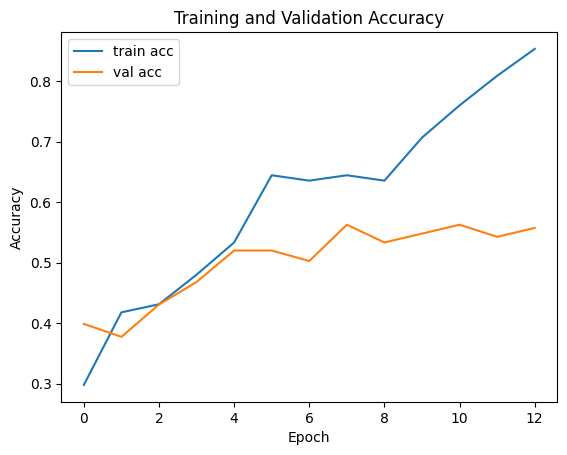

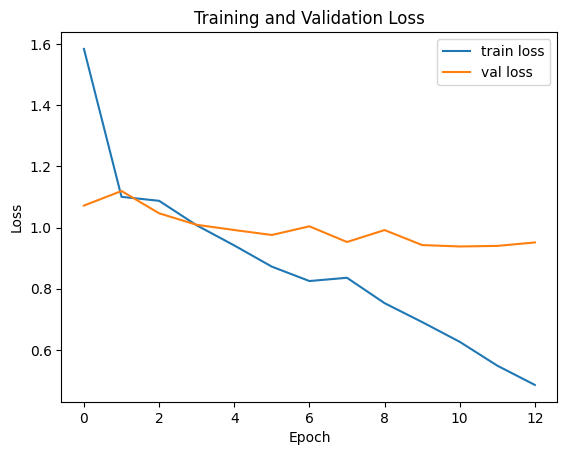

In [7]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Оцінка моделі

In [8]:
loss, acc = model.evaluate(test_data)
print(f"Test accuracy: {acc:.3f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.5627 - loss: 0.9527
Test accuracy: 0.563


#### Приклади передбачень

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


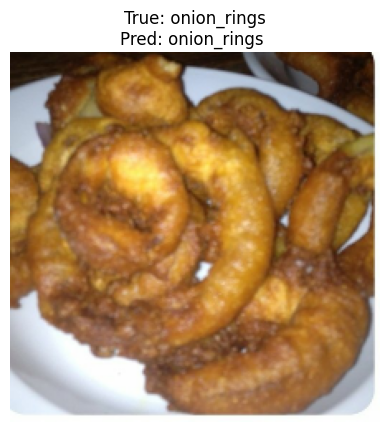

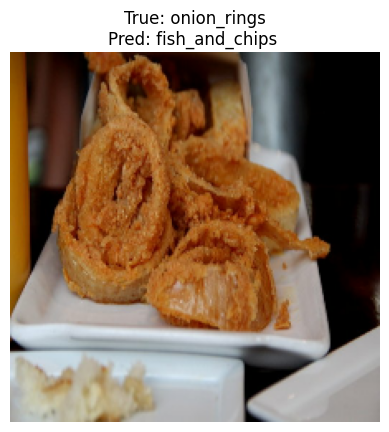

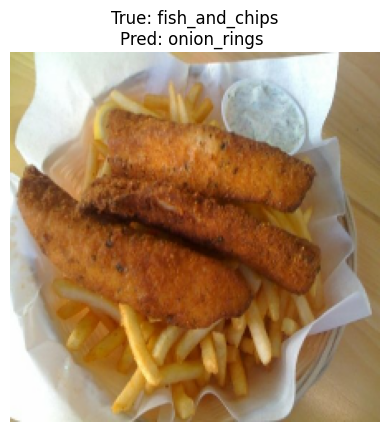

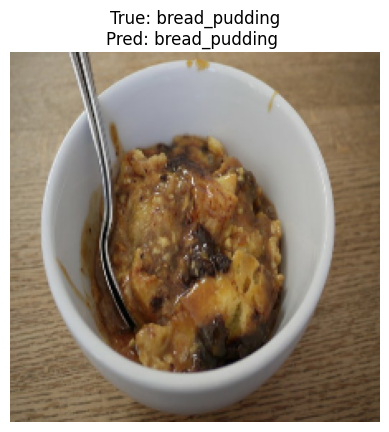

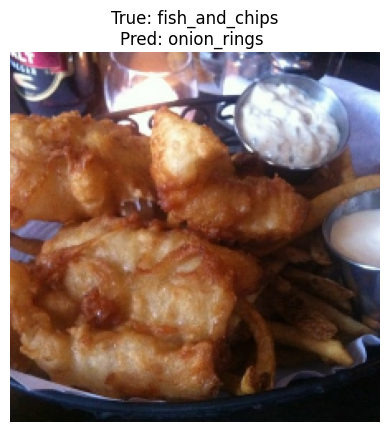

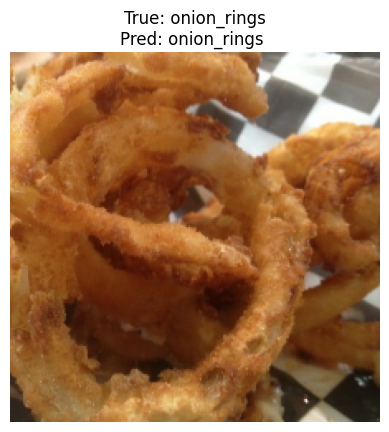

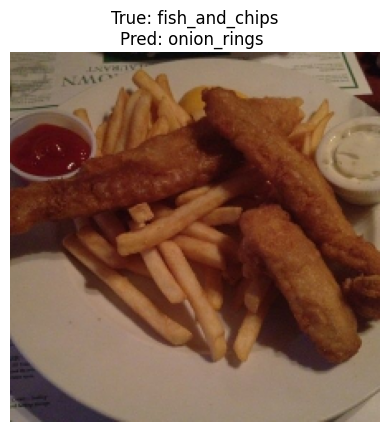

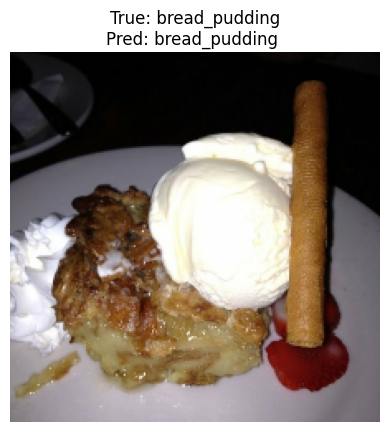

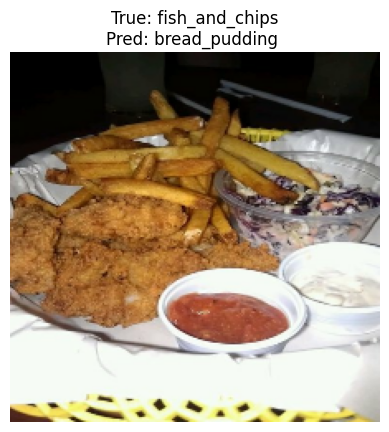

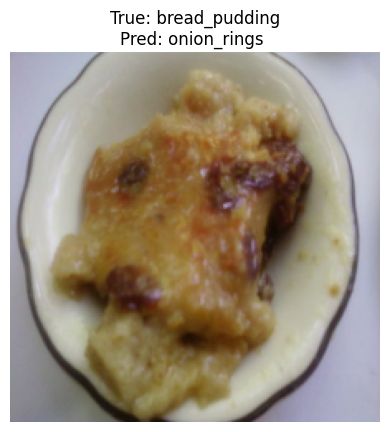

In [ ]:
class_names = train_data.class_names

for images, labels in test_data.take(1):
   preds = model.predict(images)
   for i in range(10):
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(f"True: {class_names[np.argmax(labels[i])]}\nPred: {class_names[np.argmax(preds[i])]}")
      # plt.title(f"Pred: {class_names[np.argmax(preds[i])]} — {preds[i]}")
      plt.axis("off")
      plt.show()